In [110]:
import SIA_faster as sia
import matplotlib.pylab as plt
import numpy as np
#from matplotlib.animation import FuncAnimation
from vialov import vialov

### Variables

In [111]:
n = 3           # Glens flow law
rho = 910       # kg m^-3
A = 1e-16    # a^-1 Pa^-3 
g = 9.81        # m s^-2

### Discretization

In [112]:
# grid in x dir.
delta_x = 500
x_lim =16000        # L in Vialov Profil
x = np.arange(0,x_lim+delta_x,delta_x)

# time 
t_0=0
N=int(1e04)    # Nr. of time steps
delta_t=0.0005

### Ice Sheet Geometry

In [113]:
# SMB 
a_s = 0.3#0.03 # m/a
via = vialov(x,x_lim,a_s,n,A,rho,g)

# Surface profile and bed
surface = via  #-0.001*x**2+20 #5*np.ones(np.size(x)) -0.00005*x**2+4000
#surface[len(surface)-1]=0
cut=1
x = x[0:len(x)-cut]
surface = surface[0:len(surface)-cut]
via=via[0:len(via)-cut]
bed = np.zeros(np.size(x)) #x_lim/200*np.sin(10/x_lim*x*np.pi)

# Flux boundary Condition 
boundary = np.array(((1,0),(1,-a_s*(x_lim-cut*delta_x))))

### Calculate inner velocities in x dir.

In [114]:
coef = 2*A/(n+2)*(rho*g)**n
nz=10
v_inner,Z=sia.velocity_x_inner(bed, surface,A,g,rho, delta_x,nz, n, len(surface))

### Plot

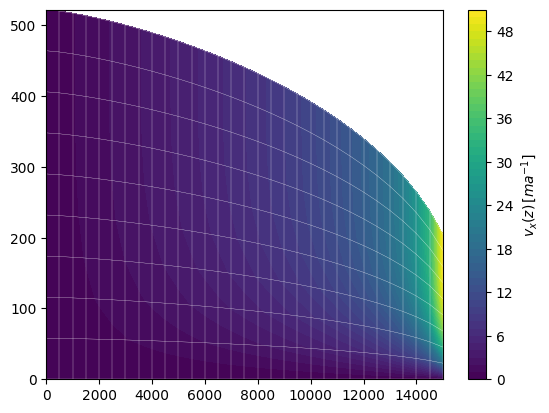

In [115]:
X = np.tile(x[:len(x)-1],(nz,1))
Z=np.array([Z[i][:len(x)-1] for i in range(nz)])
fig,ax=plt.subplots()
cp = ax.contourf(X,Z,v_inner,50,cmap="viridis")
plt.colorbar(cp,label=r"$v_x(z)\, [ma^{-1}]$")

# Plot grid
for i in range(nz):
    plt.plot(x[:len(x)-1],Z[i],"-w",linewidth=0.2)
for i in range(len(x)-1):  
    plt.axvline(x[i],linestyle="-",color="white",linewidth=0.2)


### Check if the velocity correspondes to mean velocity from SIA code

[1.22316623e-01 4.33168260e-01 7.34240641e-01 1.03987556e+00
 1.35174623e+00 1.67092406e+00 1.99840471e+00 2.33522651e+00
 2.68252320e+00 3.04156309e+00 3.41378825e+00 3.80085995e+00
 4.20471449e+00 4.62763471e+00 5.07234348e+00 5.54212863e+00
 6.04101318e+00 6.57399222e+00 7.14737011e+00 7.76925278e+00
 8.45028786e+00 9.20481542e+00 1.00527293e+01 1.10226338e+01
 1.21575129e+01 1.35256698e+01 1.52438613e+01 1.75326006e+01
 2.08733575e+01 2.65932592e+01 4.04622604e+01 6.31863350e-03]
[ 0.13018241  0.46102391  0.78145728  1.10674659  1.43867265  1.77837578
  2.12691565  2.48539736  2.85502758  3.23715616  3.63331792  4.04528095
  4.47510606  4.92522291  5.39852947  5.89852498  6.42949117  6.99674437
  7.60699434  8.26886827  8.99369851  9.79674729 10.69918779 11.73146365
 12.93932318 14.39546186 16.22414471 18.66006534 22.21565549 28.30338559
 43.06425735  0.        ]


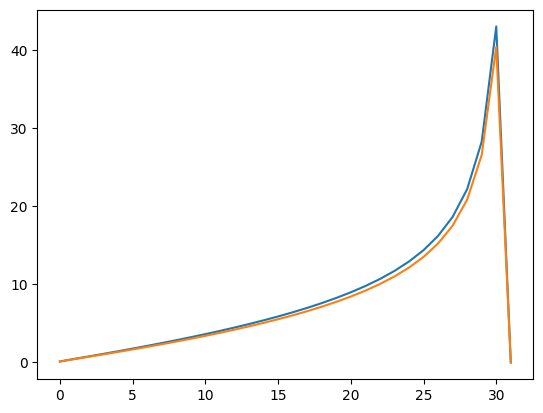

In [116]:
v_mean = sia.velocity_11(bed,surface,boundary,delta_x,n,len(surface),coef)
fig,ax = plt.subplots()
v_mean_inner = np.zeros(np.size(v_mean))
for i in range(len(Z[0])):
    v_mean_inner[i] = sum([v_inner[j][i]*(Z[j][i]-Z[j-1][i]) for j in range(1,nz)])/(Z[nz-1][i]-Z[0][i])
print(v_mean)
print(v_mean_inner)
plt.plot(v_mean_inner)
plt.plot(v_mean)


##### Top velocity from inner code = mean velocity from SIA code :/